In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [258]:
data1 = pd.read_csv("../FilesEj1/OutputEj1_1.csv")
data2 = pd.read_csv("../FilesEj1/OutputEj1_2.csv")
data3 = pd.read_csv("../FilesEj1/OutputEj1_3.csv")
data4 = pd.read_csv("../FilesEj1/OutputEj1_4.csv")

0.1


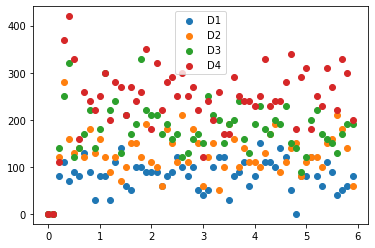

In [259]:
dt = data1['Dt'][1]
print(dt)

counts1 = data1['N']/dt
counts2 = data2['N']/dt
counts3 = data3['N']/dt
counts4 = data4['N']/dt
plt.scatter(data1['Dt'], counts1, label = "D1")
plt.scatter(data2['Dt'], counts2, label = "D2")
plt.scatter(data3['Dt'], counts3, label = "D3")
plt.scatter(data4['Dt'], counts4, label = "D4")
plt.legend()


In [260]:
#calcular los promedios de caudales para cada D
def get_values(array):
    caudal_promedio = array.mean()
    max = array.max()
    min = array.min()
    return caudal_promedio, max, min

81.5
128.16666666666666
178.83333333333334
245.16666666666666


<ErrorbarContainer object of 3 artists>

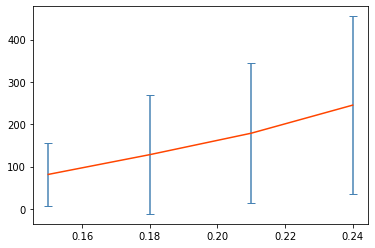

In [262]:
cp1, max1, min1 = get_values(counts1)
cp2, max2, min2 = get_values(counts2)
cp3, max3, min3 = get_values(counts3)
cp4, max4, min4 = get_values(counts4)
print(cp1)
print(cp2)
print(cp3)
print(cp4)
array_x = [0.15, 0.18, 0.21, 0.24]
array_y = [cp1, cp2, cp3, cp4]
y_errs = [max1-min1, max2-min2, max3-min3, max4-min4]
fig, ax = plt.subplots()
ax.errorbar(np.array(array_x), np.array(array_y), yerr=np.array(y_errs)/2, capsize=4, color="orangered", ecolor="steelblue")

In [263]:
def getMinTime(array_t, array_n):
    for i in range(len(array_n)):
        if array_n[i]/dt > cp1:
            return array_t[i]

In [264]:
min_time_1 = getMinTime(data1['Dt'], data1['N'])
min_time_2 = getMinTime(data2['Dt'], data2['N'])
min_time_3 = getMinTime(data3['Dt'], data3['N'])
min_time_4 = getMinTime(data4['Dt'], data4['N'])
print(min_time_1)
print(min_time_2)
print(min_time_3)
print(min_time_4)

0.3
0.2
0.2
0.2


In [276]:
def getBeverloo(c, i):
    np = 300/0.4
    return np * math.sqrt(9.8) * (array_x[i] - (c * 0.0124))**1.5

In [277]:
print(array_y[0])
print(getBeverloo(4,0))
print(array_y[1])
print(getBeverloo(4,1))
print(array_y[2])
print(getBeverloo(4,2))
print(array_y[3])
print(getBeverloo(4,3))

81.5
74.6921344774669
128.16666666666666
110.55813101169899
178.83333333333334
150.8276092524177
245.16666666666666
195.0629182925345


2.4247


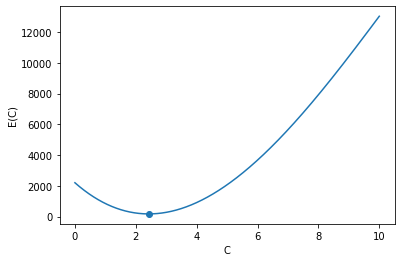

In [286]:
Ds = []
ecm = []
c = []
min_sum = 99999999999
min_C = 0
paso = 1/10000  # 0.0001
for i in range(2,100000):
    c.append(paso * i)
    sum = 0
    for j in range(len(array_x)):
        # sum += (array_y[j] - (2 *(array_x[j] / 1000) * paso * i))**2
        sum += (array_y[j] - getBeverloo(paso*i, j))**2
    sum = sum/4
    ecm.append(sum)
    if sum < min_sum:
        min_sum = sum
        min_C = paso*i
print(min_C)

plt.plot(c, ecm)
plt.xlabel("C")
plt.ylabel("E(C)")
plt.scatter([min_C], [min_sum])

2.4247000000008962


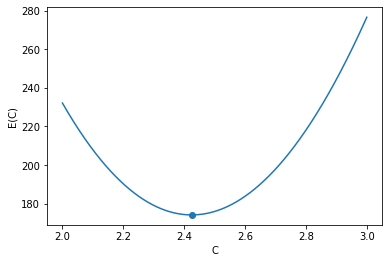

In [287]:
Ds = []
ecm = []
c = []
min_sum = 99999999999
min_C = 0
paso = 1/10000
i = 2
while i<3:
    c.append(i)
    sum = 0
    for j in range(len(array_x)):
        # sum += (array_y[j] - (2 *(array_x[j] / 1000) * paso * i))**2
        sum += (array_y[j] - getBeverloo(i, j))**2
    sum = sum/4
    ecm.append(sum)
    if sum < min_sum:
        min_sum = sum
        min_C = i
    i+=paso
print(min_C)

plt.plot(c, ecm)
plt.xlabel("C")
plt.ylabel("E(C)")
plt.scatter([min_C], [min_sum])